# What is Naive Bayes Algorithm?

### Principle of Naive Bayes Classifier
A Naive Bayes classifier is a probabilistic machine learning model that's used for classification task. The crux of the classifier is based on the Bayes theorem.
P(A|B) = (P(B|A).P(A))/P(B)


### Terms
- P(A|B) is the posterior probability of class (A, target) given predictor (B, attributes)
- P(A) is the prior probability of class.
- P(B|A) is the likelihood which is the probability of predictor given class.
- P(B) is the prior probability of predictor.


### Naive Bayes Algorithm - Working
- Take a training dataset of weather and corresponding target variable play.
- We need to classify if the players will play or not based on some condition.
- Steps:
    1. Convert the dataset into frequency table.
    2. Create likelihood table by finding probabilities like Overcast probability = 0.29 and the probability of playing is 0.64
    3. Naive Bayesian equation is used to find the posterior probability of each class. The class with the highest posterior probability is the outcome of the prediction.


### Problem
- Players will plat if the weather is sunny.
- We can solve this by the method of posterier probability.
- P(Yes|Sunny) = P(Sunny|Yes) * P(Yes) / P(Sunny)
- Here we have P(Sunny|Yes) = 3/9 = 0.33, P(Sunny) =5/14 = 0.36, P(Yes) = 9/14 = 0.64
- Now, P(Yes|Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.
- Naive Bayes uses a similar method to predict the probability of different classes based on various attributes.
- It is mostly used in text classification and with problems having multiple classes.


### Applications of Naive Bayes
***Prediction in real time***
- It is an eager learner and it learns fast.
- It is used for making predictions in real time.

***Multi class prediction***
- It is known for multi class prediction feature.
- We can predict the probability of multiple classes of target variable.

***Text Classification/ Spam Filtering***
- It is mostly used in text classification because it is good at solving multi-class problems.
- It is used in spam filtering(classifying spam email) and sentiment analysis(to identify positive and negative customer sentiments).

***Recommendation System***
- Naive Bayes filter builds a recommendation system that uses machine learning and data mining techniques to filter unsen information.
- It predicts if the user likes a given resource or not.

# Objective of Fake News Detection
The main objective is to detect the fake news which is a classic text classification problem. With a straight forward proposition. It is needed to build a model that can differentiate between "Real" news and "Fake" news.


# System Architecture

Extracting the Training Data ---------> Generate TFIDF and countvectorizer ---------> Test train split ---------> Train Models(Passive aggresive algorithm, Multinomial Naive Bayes) ---------> Test on holdout set ---------> Results and pickled models


# Modules

### Data Pre-processing
This file contains all the pre- processing functions needed to process all input documents and texts. First we read the train, tests and validation data files then performed some pre-processing like response variable distribution and data quality checks like null or missing values etc.

### Feature Extraction

### Classification

### Prediction

In [17]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
x = df.drop('label', axis=1) # features
y = df['label'] # target

In [5]:
df = df.dropna()

In [6]:
messages = df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [7]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [8]:
ps = PorterStemmer()
corpus = [] 
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] 
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [10]:
# TFidf Vectorizer
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [11]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abid',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler']

In [12]:
# Divide the dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

count_df = pd.DataFrame(x_train, columns=tfidf_v.get_feature_names())
count_df.head()

,aaron,abandon,abc,abc news,abe,abedin,abid,abil,abl,abort,...,young man,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.022379,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.018296,0.014722,0.0,...,0.026633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.050957,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.831
Confusion matrix, without normalization


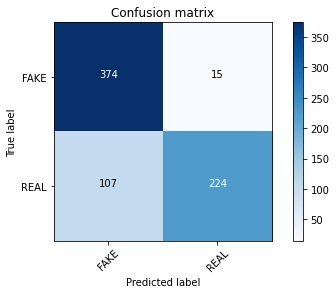

In [26]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [27]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred = sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8611111111111112
Alpha: 0.1, Score : 0.8694444444444445
Alpha: 0.2, Score : 0.8666666666666667
Alpha: 0.30000000000000004, Score : 0.8597222222222223
Alpha: 0.4, Score : 0.8555555555555555
Alpha: 0.5, Score : 0.8527777777777777
Alpha: 0.6000000000000001, Score : 0.8513888888888889
Alpha: 0.7000000000000001, Score : 0.8444444444444444
Alpha: 0.8, Score : 0.8375
Alpha: 0.9, Score : 0.8333333333333334


In [38]:
# Get Features names
feature_names = tfidf_v.get_feature_names()

In [39]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-5.896986850553509, 'trump'),
 (-5.907970944578581, 'clinton'),
 (-6.144631348239059, 'hillari'),
 (-6.298335500575183, 'elect'),
 (-6.397926987608068, 'us'),
 (-6.591945337846607, 'peopl'),
 (-6.628204625877579, 'state'),
 (-6.629704158068672, 'email'),
 (-6.644412249730442, 'vote'),
 (-6.692814058898546, 'one'),
 (-6.746882378757433, 'hillari clinton'),
 (-6.7565666490231315, 'fbi'),
 (-6.757997840017799, 'american'),
 (-6.7629873533684055, 'would'),
 (-6.790123860243235, 'like'),
 (-6.829833741697983, 'go'),
 (-6.848338893321211, 'octob'),
 (-6.883842753543826, 'war'),
 (-6.896665336516886, 'obama'),
 (-6.897522678051416, 'new')]

In [40]:
# Most real
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-9.320369918130927, 'abe'),
 (-9.320369918130927, 'actress'),
 (-9.320369918130927, 'ask mr'),
 (-9.320369918130927, 'barbara'),
 (-9.320369918130927, 'basketbal'),
 (-9.320369918130927, 'bay area'),
 (-9.320369918130927, 'belgium'),
 (-9.320369918130927, 'bentley'),
 (-9.320369918130927, 'berggruen'),
 (-9.320369918130927, 'borman'),
 (-9.320369918130927, 'branca'),
 (-9.320369918130927, 'breitbart com'),
 (-9.320369918130927, 'breitbart texa'),
 (-9.320369918130927, 'brief post'),
 (-9.320369918130927, 'calif'),
 (-9.320369918130927, 'call mr'),
 (-9.320369918130927, 'campaign mr'),
 (-9.320369918130927, 'casino'),
 (-9.320369918130927, 'championship'),
 (-9.320369918130927, 'commut')]